# (Investigating the Philadelphia bikashare dataset for (2020 Q3))
## by (Amira Alakhdar)

## Preliminary Wrangling

> The City of Philadelphia bikashare dataset (2020 Q3) has 15 columns as the following:

- trip_id: Locally unique integer that identifies the trip
- duration: Length of trip in minutes
- start_time: The date/time when the trip began, presented in ISO 8601 format in local time
- end_time: The date/time when the trip ended, presented in ISO 8601 format in local time
- start_station: The station ID where the trip originated (for station name and more information on each station see the Station  Table)
- start_lat: The latitude of the station where the trip originated
- start_lon: The longitude of the station where the trip originated
- end_station: The station ID where the trip terminated (for station name and more information on each station see the Station Table)
- end_lat: The latitude of the station where the trip terminated
- end_lon: The longitude of the station where the trip terminated
- bike_id:  Locally unique integer that identifies the bike
- plan_duration: The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up)
- trip_route_category: “Round Trip” for trips starting and ending at the same station or “One Way” for all other trips
- passholder_type: The name of the passholder’s plan
- bike_type: The kind of bike used on the trip, including standard pedal-powered bikes or electric assist bikes


- Source: https://www.rideindego.com/about/data/

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
url = 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2020/10/indego-trips-2020-q3.zip'
r = requests.get(url, allow_redirects=True)
open('indego-trips-2020-q3.zip', 'wb').write(r.content)

4957342

In [3]:
import zipfile
with zipfile.ZipFile('indego-trips-2020-q3.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:

df = pd.read_csv('indego-trips-2020-q3.csv')

C:\Users\Laptop Shop\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269985 entries, 0 to 269984
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              269985 non-null  int64  
 1   duration             269985 non-null  int64  
 2   start_time           269985 non-null  object 
 3   end_time             269985 non-null  object 
 4   start_station        269985 non-null  int64  
 5   start_lat            269983 non-null  float64
 6   start_lon            269983 non-null  float64
 7   end_station          269985 non-null  int64  
 8   end_lat              264365 non-null  float64
 9   end_lon              264365 non-null  float64
 10  bike_id              269985 non-null  object 
 11  plan_duration        269985 non-null  int64  
 12  trip_route_category  269985 non-null  object 
 13  passholder_type      269985 non-null  object 
 14  bike_type            269985 non-null  object 
dtypes: float64(4), in

In [6]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,345127322,10,7/1/2020 0:03,7/1/2020 0:13,3021,39.953899,-75.169022,3051,39.967442,-75.175072,14512,365,One Way,Indego365,standard
1,345127320,112,7/1/2020 0:06,7/1/2020 1:58,3067,39.964111,-75.199730,3104,39.966640,-75.192093,19638,30,One Way,Indego30,electric
2,345127318,111,7/1/2020 0:07,7/1/2020 1:58,3067,39.964111,-75.199730,3104,39.966640,-75.192093,16566,30,One Way,Indego30,electric
3,345127315,3,7/1/2020 0:07,7/1/2020 0:10,3187,39.957249,-75.172318,3168,39.951340,-75.173943,14545,30,One Way,Indego30,standard
4,345127313,42,7/1/2020 0:08,7/1/2020 0:50,3056,39.976688,-75.158127,3017,39.980030,-75.143707,19835,1,One Way,Day Pass,electric


In [7]:
df.shape

(269985, 15)

### What is the structure of your dataset?

The data set has 269985 rows and 15 columns. 

### What is/are the main feature(s) of interest in your dataset?
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the duration depend on if a bike is a standard or electric?
- Does the duration depend on passholder type?
- Does the trip route category affect the duration?
- What are the popular start and end locations? Do they change according to different variables?



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
start time, duration, bike_type, passholder_type and trip_route_category.

## Wrangling the data

In [8]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['month'] = df['start_time'].dt.month
df['day_of_week'] = df['start_time'].dt.weekday

df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,month,day_of_week
0,345127322,10,2020-07-01 00:03:00,2020-07-01 00:13:00,3021,39.953899,-75.169022,3051,39.967442,-75.175072,14512,365,One Way,Indego365,standard,7,2
1,345127320,112,2020-07-01 00:06:00,2020-07-01 01:58:00,3067,39.964111,-75.199730,3104,39.966640,-75.192093,19638,30,One Way,Indego30,electric,7,2
2,345127318,111,2020-07-01 00:07:00,2020-07-01 01:58:00,3067,39.964111,-75.199730,3104,39.966640,-75.192093,16566,30,One Way,Indego30,electric,7,2
3,345127315,3,2020-07-01 00:07:00,2020-07-01 00:10:00,3187,39.957249,-75.172318,3168,39.951340,-75.173943,14545,30,One Way,Indego30,standard,7,2
4,345127313,42,2020-07-01 00:08:00,2020-07-01 00:50:00,3056,39.976688,-75.158127,3017,39.980030,-75.143707,19835,1,One Way,Day Pass,electric,7,2


In [9]:
days = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
weekday= df['day_of_week']
day_names=[]
for i in weekday:
    day_names.append(days[i])
df['day_of_week'] = day_names


In [10]:
df.columns = df.columns.str.replace('_', ' ')
df['duration (minutes)'] = df.duration
df = df.drop(['duration'], axis=1)

In [11]:
df = df.dropna()
df

,trip id,start time,end time,start station,start lat,start lon,end station,end lat,end lon,bike id,plan duration,trip route category,passholder type,bike type,month,day of week,duration (minutes)
0,345127322,2020-07-01 00:03:00,2020-07-01 00:13:00,3021,39.953899,-75.169022,3051,39.967442,-75.175072,14512,365,One Way,Indego365,standard,7,Mon,10
1,345127320,2020-07-01 00:06:00,2020-07-01 01:58:00,3067,39.964111,-75.199730,3104,39.966640,-75.192093,19638,30,One Way,Indego30,electric,7,Mon,112
2,345127318,2020-07-01 00:07:00,2020-07-01 01:58:00,3067,39.964111,-75.199730,3104,39.966640,-75.192093,16566,30,One Way,Indego30,electric,7,Mon,111
3,345127315,2020-07-01 00:07:00,2020-07-01 00:10:00,3187,39.957249,-75.172318,3168,39.951340,-75.173943,14545,30,One Way,Indego30,standard,7,Mon,3
4,345127313,2020-07-01 00:08:00,2020-07-01 00:50:00,3056,39.976688,-75.158127,3017,39.980030,-75.143707,19835,1,One Way,Day Pass,electric,7,Mon,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269979,356404374,2020-09-30 23:52:00,2020-09-30 23:59:00,3167,39.950249,-75.160278,3154,39.959240,-75.158211,3372,30,One Way,Indego30,standard,9,Mon,7
269980,356404373,2020-09-30 23:52:00,2020-09-30 23:56:00,3045,39.947922,-75.162369,3190,39.948921,-75.169907,14528,30,One Way,Indego30,standard,9,Mon,4
269981,356404746,2020-09-30 23:56:00,2020-10-01 00:02:00,3125,39.943909,-75.167351,3045,39.947922,-75.162369,11878,30,One Way,Indego30,standard,9,Mon,6
269982,356404744,2020-09-30 23:57:00,2020-10-01 00:02:00,3125,39.943909,-75.167351,3045,39.947922,-75.162369,17177,30,One Way,Indego30,electric,9,Mon,5


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

First: Explore the duration variable:

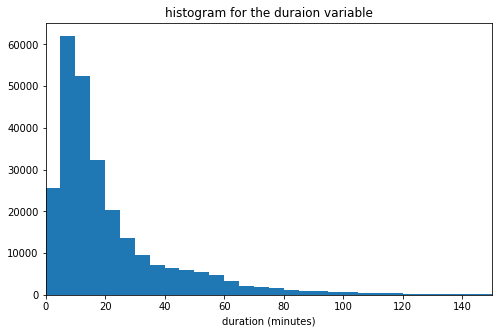

In [12]:
# start with a standard-scaled plot
binsize = 5
bins = np.arange(0, df['duration (minutes)'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df, x = 'duration (minutes)' , bins = bins)
plt.xlabel('duration (minutes)')
plt.title('histogram for the duraion variable')
plt.xlim(0, 150)
plt.show()


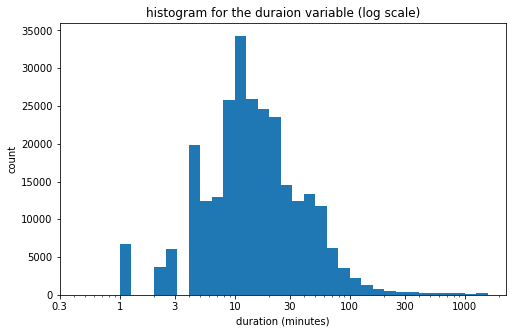

In [13]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration (minutes)'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration (minutes)', bins = bins)
plt.xscale('log')
plt.xlabel('duration (minutes)')
plt.ylabel('count')
plt.title('histogram for the duraion variable (log scale)')
plt.xticks(ticks= [0.3, 1, 3, 10, 30, 100, 300, 1000], labels=['0.3', '1', '3', '10', '30', '100', '300', '1000'])

plt.show()

In the first graph, Duration  has a long-tailed right-skewed distribution, however when, plotted on a log scale, it showed a normal logaritmic distribution, with a lot bars in the high end, and fewer bars on the low price end, but one of them shows a significant frequency between 4-5 minutes.


Plotting start time:

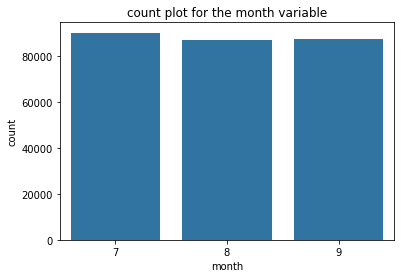

In [14]:
#plotting by month
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='month', color=base_color)
plt.title('count plot for the month variable');


The bar chart for frequency per month showed uniform distribution for the bike rides among the 3 months of the quarter.

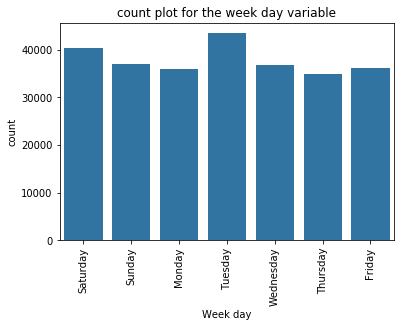

In [15]:
#plotting by weekday
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='day of week', color=base_color)
days = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.xlabel('Week day')
plt.xticks(ticks= np.arange(7), labels=days, rotation=90);
plt.title('count plot for the week day variable');


The bar chart for frequency per week day showed that no. of rides was very close for all days, and Thursday had the highest rides with a slight increase over the other days. 


Plotting by bike_type, passholder_type and trip_route_category.

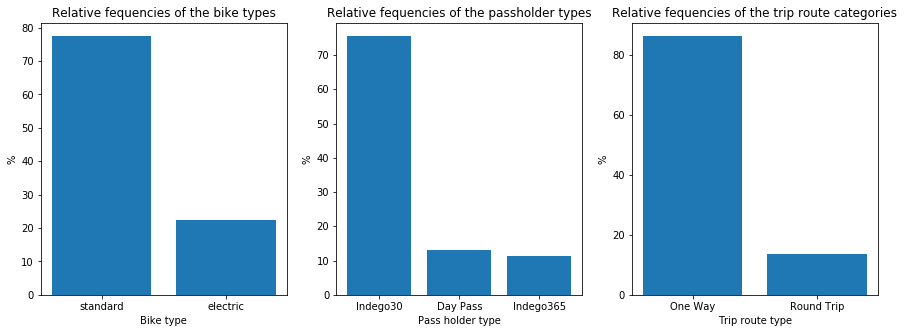

In [16]:


plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 1)

freq_b = df['bike type'].value_counts() / len(df)
indx = [0,1]
plt.bar(indx, freq_b*100)
plt.ylabel('%')
plt.title('Relative fequencies of the bike types')
plt.xticks(indx, freq_b.index)
plt.xlabel('Bike type')



plt.subplot(1, 3, 2)
freq_p = df['passholder type'].value_counts().sort_values(ascending=False) / len(df)
indx = [0,1,2]
plt.bar(indx, freq_p*100)
plt.ylabel('%')
plt.title('Relative fequencies of the passholder types')
plt.xticks(indx, freq_p.index)
plt.xlabel('Pass holder type')





plt.subplot(1, 3, 3)
freq_m = df['trip route category'].value_counts().sort_values(ascending=False) / len(df)
indx = [0,1]
plt.bar(indx, freq_m*100)
plt.ylabel('%')
plt.title('Relative fequencies of the trip route categories')
plt.xticks(indx, freq_m.index)
plt.xlabel('Trip route type');



The analysis showed that:
- about 80% of the trips are done with strandard bike type, and the remaining use electric bikes.
- Indego30 is the most frequent pass holder type in all trips.
- Over 80% of the trips are One way route type. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the duration variable was a littel bit odd, with trips taking only 1-2 minutes and some trips taking over 1000 minutes, there a logaritmic transformation of the data was needed.

> The month and weekday variables had an almost uniform distribution.

> The distribution of the bike type, pass holder and trip route variables showed:
- about 80% of the trips are done with strandard bike type, and the remaining use electric bikes.
- Indego30 is the most frequent pass holder type in all trips.
- Over 80% of the trips are One way route type.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, Duration variable has a long-tailed right-skewed distribution, however when, plotted on a log scale, it showed a normal logaritmic distribution, with a lot bars in the high end, and fewer bars on the low price end, but one of them shows a significant frequency between 4-5 minutes.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

First of all, we dovide the variables into numerical and catagorical data.

In [17]:
numeric_vars = ['duration (minutes)']
categoric_vars = ['month', 'day of week',  'bike type', 'passholder type', 'trip route category']

1- Box grid plots are used to inetigate the relationship between duration and the catagorical variables.

C:\Users\Laptop Shop\anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 14400x1440 with 0 Axes>

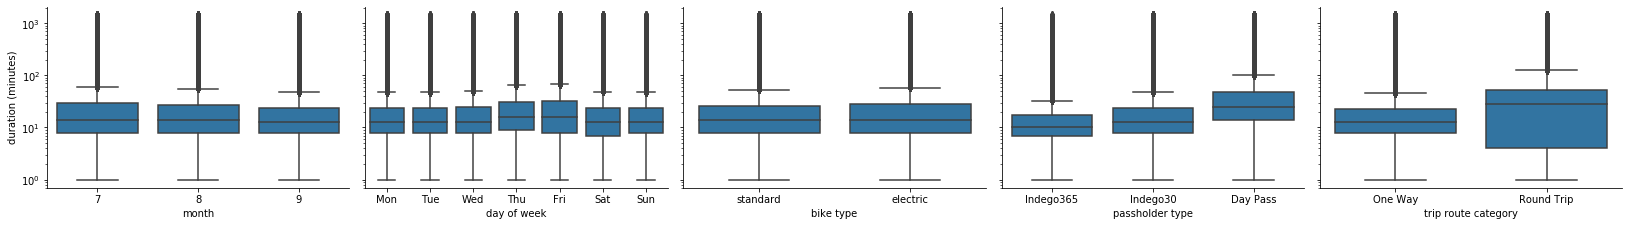

In [18]:

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [200, 20])
g = sb.PairGrid(data = df, y_vars = ['duration (minutes)'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)

fig = g.map(boxgrid)

    
plt.yticks(ticks= [0.3, 1, 3, 10, 30, 100, 300, 1000], labels=['0.3', '1', '3', '10', '30', '100', '300', '1000'])
plt.yscale('log')

plt.show();

- The average duration of round trips is higher than the average duration of one way trips.
- The average duration did not have a significant variations for different months, different week days or bike types.
- The average duration were the highest in Day pass holder, followed by Indego30 pass holder followed by indego365.

2- Clustered bar charts plots are used to inetigate the relationship between the catagorical variables.

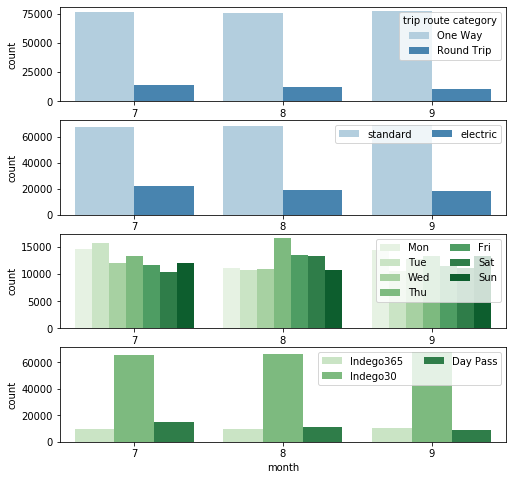

In [19]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])
plt.title('')
categoric_vars = ['month', 'day of week',  'bike type', 'passholder type', 'trip route category']


# subplot 1: month vs trip route
plt.subplot(4, 1, 1)
sb.countplot(data = df, x = 'month', hue = 'trip route category', palette = 'Blues')

# subplot 2: month vs. bike type
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df, x = 'month', hue = 'bike type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: month vs. daud of the week
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df, x = 'month', hue = 'day of week', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 4: month vs passholder_type
ax = plt.subplot(4, 1, 4)
sb.countplot(data = df, x = 'month', hue = 'passholder type', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping


plt.show()


The distribtion of the four variables: 'day_of_week',  'bike_type', 'passholder_type', 'trip_route_category' did not show variation between the 3 months

3- plotting heat map between the latitude and longitude of the station where the trips start and ends to find out popular start and end areas among bike riders.

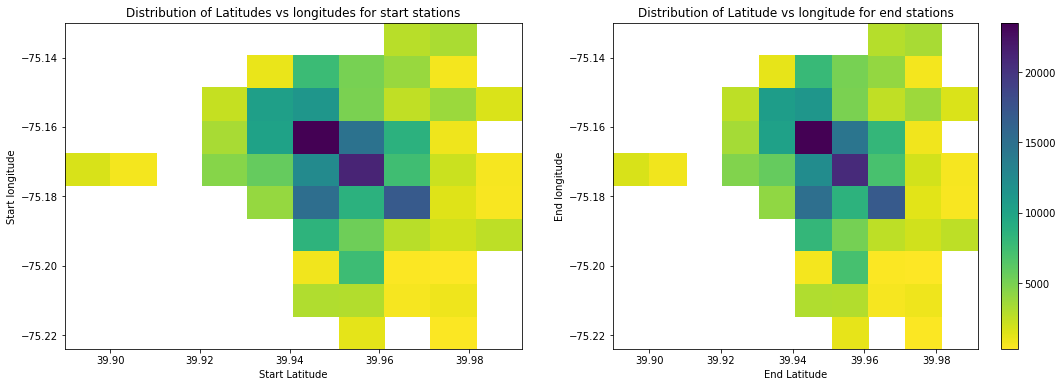

In [28]:
plt.figure(figsize = [18, 6])

plt.subplot(1, 2, 1)
plt.hist2d(data = df, x = 'start lat', y = 'start lon', cmin=0.5, cmap='viridis_r')
plt.title('Distribution of Latitudes vs longitudes for start stations')
plt.xlabel('Start Latitude')
plt.ylabel('Start longitude');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = df, x = 'end lat', y = 'end lon', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.title('Distribution of Latitude vs longitude for end stations')
plt.xlabel('End Latitude')
plt.ylabel('End longitude');


The two graphs for popoular start locations and popular end locations look identical which means that there are areas with higher numbers of bike riders where the company should increase the number of bikes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The average duration was higher for round trips campared with one way trips.
> The average duration were the highest in Day pass holder, followed by Indego30 pass holder followed by indego365.
> The average duration showed no effect for variation of months, week days or bike types.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The two graphs for popoular start locations and popular end locations looked identical which means that popular start stations are also popular end stations.

## Multivariate Exploration

>Here, I would like to investigate if the distribution of start and end locations vary according to the different catagories of 'month', 'day_of_week',  'bike_type', 'passholder_type', 'trip_route_category'. 


In [21]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)

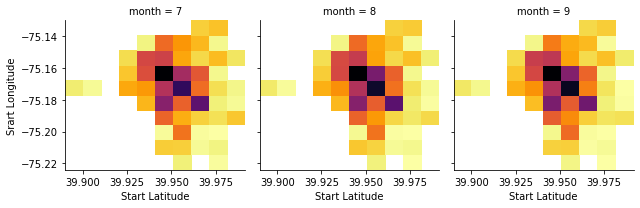

In [31]:
# create faceted heat maps on levels of month variable
g = sb.FacetGrid(data = df, col = 'month', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'start lat', 'start lon', color = 'inferno_r')
g.set_xlabels('Start Latitude')
g.set_ylabels('Srart Longitude')



There was no signicafant change in trips start locations by month 

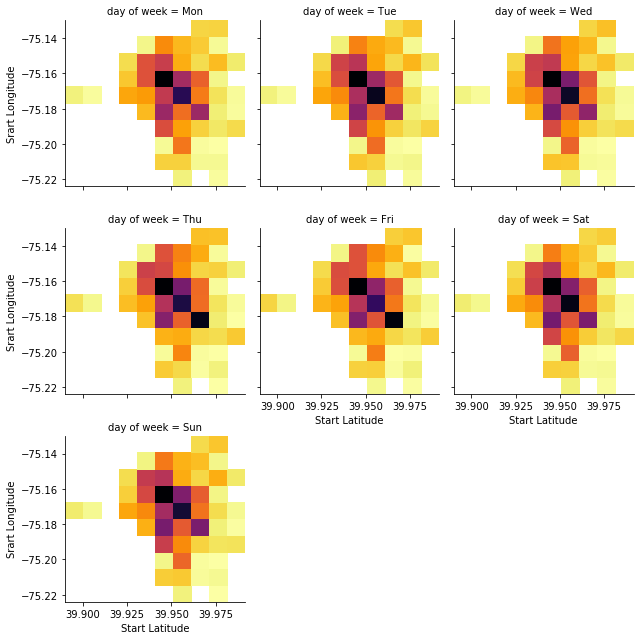

In [32]:
# create faceted heat maps on levels of week day variable
g = sb.FacetGrid(data = df, col = 'day of week', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'start lat', 'start lon', color = 'inferno_r')
g.set_xlabels('Start Latitude')
g.set_ylabels('Srart Longitude')


The most popular start location shifted In Thursday and Friday, but other than that there was no significant change.

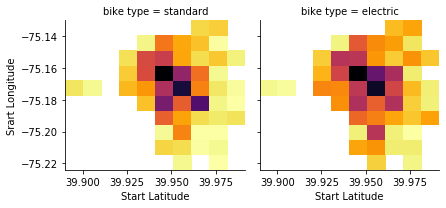

In [24]:
g = sb.FacetGrid(data = df, col = 'bike type', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'start lat', 'start lon', color = 'inferno_r')
g.set_xlabels('Start Latitude')
g.set_ylabels('Srart Longitude')

The most frequent start locations showed little variation with bike type

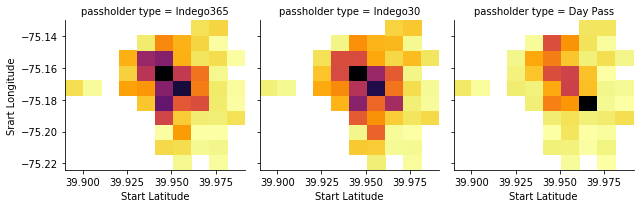

In [25]:
g = sb.FacetGrid(data = df, col = 'passholder type', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'start lat', 'start lon', color = 'inferno_r')
g.set_xlabels('Start Latitude')
g.set_ylabels('Srart Longitude')

There was a significant variation in start location according to the type of pass holder wether it is a daily, montly or yearly subscription

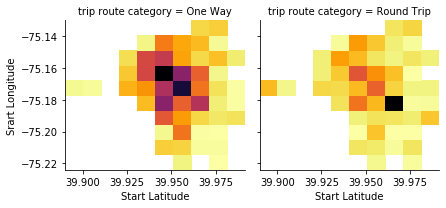

In [33]:
g = sb.FacetGrid(data = df, col = 'trip route category', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'start lat', 'start lon', color = 'inferno_r')
g.set_xlabels('Start Latitude')
g.set_ylabels('Srart Longitude')

There was a significant variation in start location according to the type of the trip.

> The average duration was higher for round trips campared with one way trips.
> Also, the average duration were the highest in Day pass holder, followed by Indego30 pass holder followed by indego365.
> Therefore, I will plot a box plots with the average duration on the y-axis, pass holder on the x-axis, using trip type as hue.



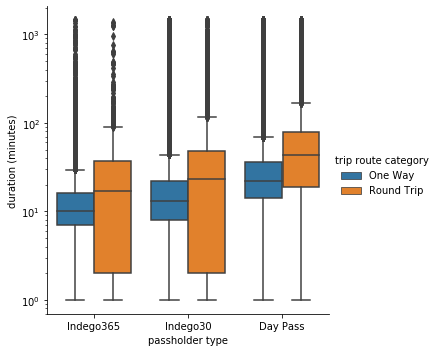

In [34]:
sb.catplot(x='passholder type', y='duration (minutes)', hue='trip route category', kind="box", data=df)
plt.yticks(ticks= [0.3, 1, 3, 10, 30, 100, 300, 1000], labels=['0.3', '1', '3', '10', '30', '100', '300', '1000'])
plt.yscale('log')


The graph showed the same trend where duration was the highest in daily subscription followed by monthly subscription, and yearly subscriper making the shortest duration averages.
Round trips had higher trip averages than one way trips in the 3 subscription catagories.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Trip route catagory of round trip strenthened the pass holder catagory of daily pass increasing the average duration of the trip

### Were there any interesting or surprising interactions between features?

> Yes, the most frequent start location showed significant variation by the type of pass holder supsciption and trip type

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!